## Analysis of SF311 data regarding human and animal wastes 

Our team analyzed non-emergency 311 calls regarding human and animal wastes to San Francisco city. This notebook explores which neighborhood in San Francisco had higher concentration of wastes in 2019.

In [148]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [149]:
%matplotlib inline

This data originally came from 311 calls data on San Francisco open data portal. The data was vetted through DB Browser for SQLite, which allowed us to filter for RequestType that corresponds to human and animal waste calls. We saved the file as "human_animal_waste_311.csv" and used it for our analysis below. 

Original data source: https://data.sfgov.org/City-Infrastructure/311-Cases/vw6y-z8j6

In [150]:
import os
data_dir = os.environ['DATA_DIR']
waste_fp = os.path.join(data_dir, 'processed', 'human_animal_waste_311.csv')
with open(waste_fp, 'r') as source_file:
    text = source_file.read()

In [151]:
waste = pd.read_csv(waste_fp)

In [152]:
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163435 entries, 0 to 163434
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CaseID                       163435 non-null  int64  
 1   Opened                       163435 non-null  object 
 2   Closed                       162126 non-null  object 
 3   Updated                      163435 non-null  object 
 4   Status                       163435 non-null  object 
 5   StatusNotes                  163380 non-null  object 
 6   ResponsibleAgency            163435 non-null  object 
 7   Category                     163435 non-null  object 
 8   RequestType                  163435 non-null  object 
 9   RequestDetails               163429 non-null  object 
 10  Address                      163435 non-null  object 
 11  Street                       161876 non-null  object 
 12  SupervisorDistrict           161876 non-null  float64
 13 

We wanted to focus on requests that came in during 2019, which was the year with the highest amount of waste overall. In order to do so, we first extracted the "year" from the "Opened" column (which includes the full date for when the request came in) and created a new column.

In [153]:
waste['year'] = pd.DatetimeIndex(waste['Opened']).year

In [154]:
waste.info() # this shows new "year" column at the end 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163435 entries, 0 to 163434
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CaseID                       163435 non-null  int64  
 1   Opened                       163435 non-null  object 
 2   Closed                       162126 non-null  object 
 3   Updated                      163435 non-null  object 
 4   Status                       163435 non-null  object 
 5   StatusNotes                  163380 non-null  object 
 6   ResponsibleAgency            163435 non-null  object 
 7   Category                     163435 non-null  object 
 8   RequestType                  163435 non-null  object 
 9   RequestDetails               163429 non-null  object 
 10  Address                      163435 non-null  object 
 11  Street                       161876 non-null  object 
 12  SupervisorDistrict           161876 non-null  float64
 13 

We then selected the columns that we wanted to keep. 

In [155]:
waste_trunc = waste[['CaseID','Neighborhood','Category','Latitude','Longitude','year']] 

In [156]:
waste_trunc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163435 entries, 0 to 163434
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CaseID        163435 non-null  int64  
 1   Neighborhood  161512 non-null  object 
 2   Category      163435 non-null  object 
 3   Latitude      163435 non-null  float64
 4   Longitude     163435 non-null  float64
 5   year          163435 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 7.5+ MB


Then we filtered for calls that were requested in 2019. 

In [157]:
waste_2019 = waste_trunc['year']==2019

In [158]:
waste_2019_list = waste_trunc[waste_2019]

In [159]:
waste_2019_list.head()

,CaseID,Neighborhood,Category,Latitude,Longitude,year
0,10858769,Civic Center,Street and Sidewalk Cleaning,37.781504,-122.417337,2019
33,11707729,Lower Nob Hill,Street and Sidewalk Cleaning,37.787155,-122.412355,2019
80,11864728,Bernal Heights,Street and Sidewalk Cleaning,37.741352,-122.421795,2019
106,11881905,Mission,Street and Sidewalk Cleaning,37.769627,-122.417007,2019
107,11881911,South of Market,Street and Sidewalk Cleaning,37.774436,-122.420334,2019


We grouped the data by neighborhood to see the sum of calls regarding wastes for each neighborhood. 

In [168]:
waste_by_area = waste_2019_list.groupby('Neighborhood').count()

In [169]:
waste_by_area.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, Alamo Square to Westwood Park
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   CaseID     115 non-null    int64
 1   Category   115 non-null    int64
 2   Latitude   115 non-null    int64
 3   Longitude  115 non-null    int64
 4   year       115 non-null    int64
dtypes: int64(5)
memory usage: 5.4+ KB


In order to create a map, we downloaded the neighborhood map in shape file from the same open data portal.

Shape file source: https://data.sfgov.org/Geographic-Locations-and-Boundaries/Analysis-Neighborhoods/p5b7-5n3h

In [160]:
data_dir = os.environ['DATA_DIR']
sf_shape_fp = os.path.join(data_dir, 'raw', 'sf_neighborhoods.shp')
with open(sf_shape_fp, 'rb') as source_file:
    text = source_file.read()

In [161]:
sf_shape = gpd.read_file(sf_shape_fp)

In [162]:
sf_shape.head()

,nhood,geometry
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7..."
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7..."
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7..."
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7..."
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7..."


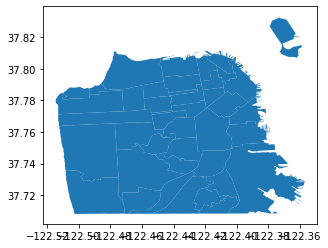

In [163]:
sf_shape.plot()

Creating a map requires joining the shape file with our csv file. To do so, we created a new column called "Neighborhood" for our shape file.

In [170]:
sf_shape['Neighborhood'] = sf_shape['nhood']

In [171]:
sf_shape.head()

,nhood,geometry,Neighborhood
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",Bayview Hunters Point
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7...",Bernal Heights
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7...",Castro/Upper Market
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7...",Chinatown
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7...",Excelsior


We then joined the two files on the column "Neighborhood."

In [174]:
joined = sf_shape.merge(
    waste_by_area,
    on = "Neighborhood",
    how = "left",
)

In [175]:
joined.head()

,nhood,geometry,Neighborhood,CaseID,Category,Latitude,Longitude,year
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7...",Bayview Hunters Point,NaN,NaN,NaN,NaN,NaN
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7...",Bernal Heights,264.0,264.0,264.0,264.0,264.0
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7...",Castro/Upper Market,NaN,NaN,NaN,NaN,NaN
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7...",Chinatown,546.0,546.0,546.0,546.0,546.0
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7...",Excelsior,92.0,92.0,92.0,92.0,92.0


In [176]:
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   nhood         41 non-null     object  
 1   geometry      41 non-null     geometry
 2   Neighborhood  41 non-null     object  
 3   CaseID        31 non-null     float64 
 4   Category      31 non-null     float64 
 5   Latitude      31 non-null     float64 
 6   Longitude     31 non-null     float64 
 7   year          31 non-null     float64 
dtypes: float64(5), geometry(1), object(2)
memory usage: 2.9+ KB


Below is a chloropleth of the human and animal waste 311 calls made in 2019, with darker shades corresponding to more calls.

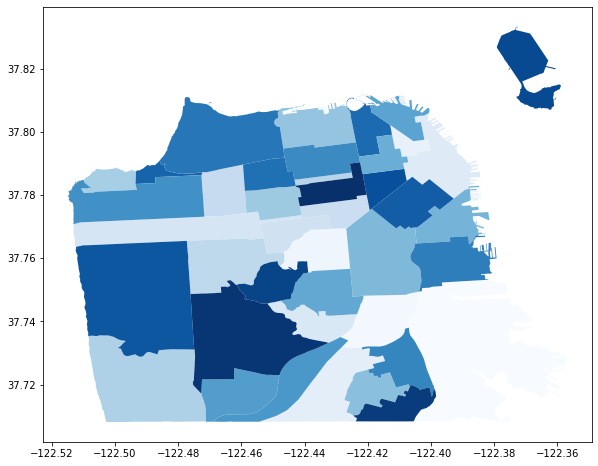

In [177]:
joined.plot(
    column = 'Neighborhood', 
    cmap = 'Blues',
    figsize=(16, 8)
)